<div style="border:solid Chocolate 2px; padding: 40px">

<b>Привет!👋</b>

Меня зовут Огурлиев Анзор, я буду ревьюером твоего проекта. Сразу хочу предложить тебе общаться на "ты", если тебе это неудобно, скажи мне об этом. Нам предстоит пройти с тобой через тернистый и от того интересный путь анализа данных! Можешь не переживать, я всегда помогу тебе, если у тебя возникнут вопросы)

По ходу твоей работы я буду оставлять свои комментарии, по выполненным тобой шагам. Попрошу тебя не удалять их, так мне будет проще отслеживать твой прогресс в случае повторной проверки.

Очень важно вести диалог и обсуждать те пункты, которые у тебя могли не получиться, поэтому, ты можешь оставлять свои комментарии, и мы обязательно во всем разберемся! Самое главное - выделяй свои комментарии удобным для тебя способом (цвет, рамка), но так, чтобы они отчетлитво отличались от моих комментариев. Так мы ни в чем не запутаемся)

Свои комментарии я буду выделять так: <font color='green'>зеленый</font>, <font color='gold'>желтый</font> и <font color='red'>красный</font> цвет, например:

<br/>

<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Этот комментарий я буду оставлять, если твое решение оптимально для данного шага.
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Некоторые замечания и рекомендации💡:</b> Это не означает, что ты совершил ошибку. Такими комментариями я буду отмечать места, где ты справился с задачей, но её можно решить ещё лучше. Также в таких комментариях я буду оставлять для тебя другие советы.
</div>


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера V1<a class="tocSkip"></h2>


<b>На доработку🤔:</b>
Если решение, которое ты применил на определенном шаге, требует значительных изменений, то я буду оставлять такой комментарий. Тебе нужно будет подумать еще раз как правильным образом решить данный этап. Если ревью содержит такие комментарии, то я не смогу принять проект с первого раза.
</div>

P.S. В оглавлении комментария ты увидишь `V1` (`V1`, `V2`, `V3`) - это версия моего комментария, которая понадобится нам с тобой, чтобы не запутаться, если потребуется оставить тебе комментарии после первой проверки.

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Молодец что начинаешь проект с описания!

### Откроем файл с данными и изучим общую информацию

In [1]:
import pandas as pd
import matplotlib as plt

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t') 

In [3]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

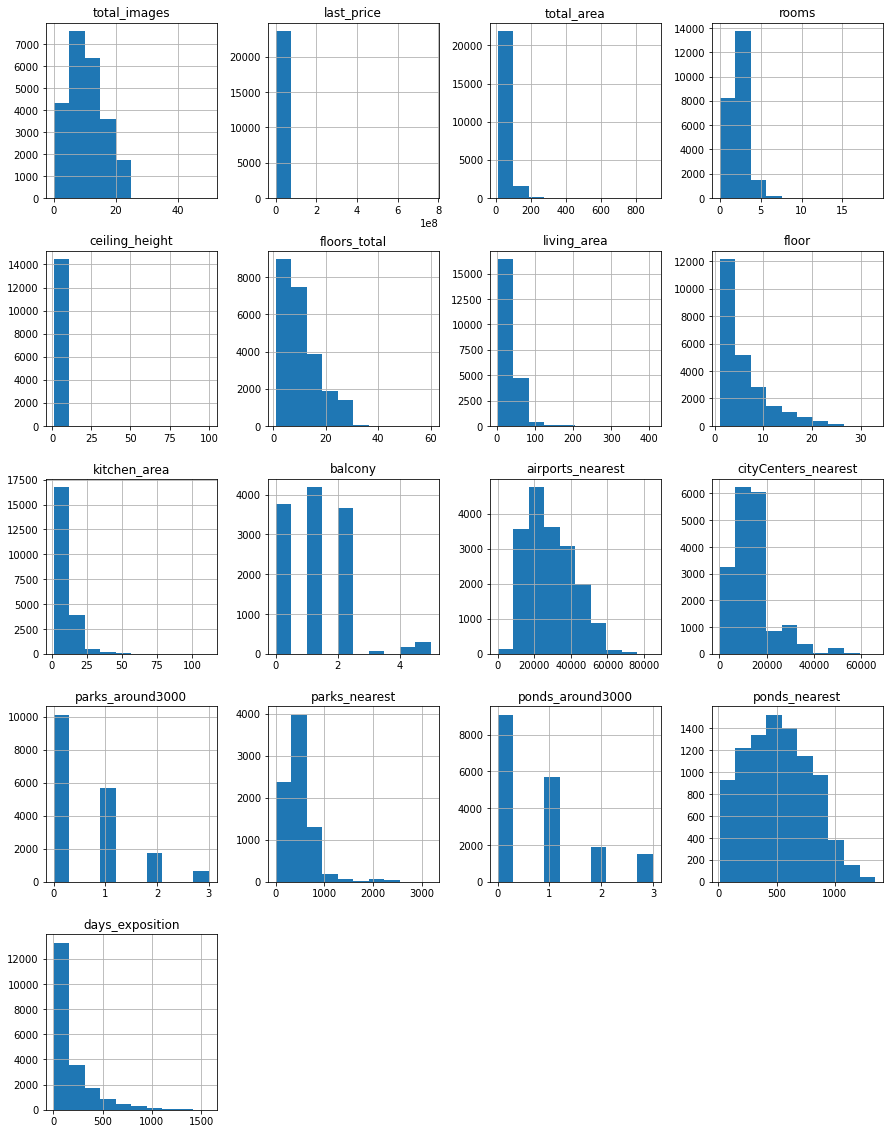

In [5]:
data.hist(figsize=(15, 20))

Изучив на первый взгляд данные, можно сразу заметить большое количество пропусков и неподходящий тип данных в некоторых столбцах. Необходимо провести предобработку данных. 

<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Правильно рассмотрела данные, с которыми предстоит работать.

### Выполним предобработку данных

**2.1 Удаление пропусков**

In [7]:
data.isna().sum() #выведем количество пропущенных значений для каждого столбца

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

***Aпартаменты***

In [8]:
is_apartment_percentage = len(data.query('is_apartment == True'))/len(data['is_apartment'].dropna()) #разделим количество апартаментов на общее количество заполненных данных в столбце
print(f'{is_apartment_percentage:.2%}')

1.80%


Процент апартаментов из всех заполненных данных составляет всего 1,8%. Это может говорить о том, что пропущенными значениями с высокой долей вероятности являются квартиры, а не апартаменты. В таком случае мы можем заменить все пропуски на False

In [9]:
data['is_apartment'] = data['is_apartment'].fillna(False)

***Балкон***

Пропуски в этом столбце можем заменить на 0, пропущенные значения скорее всего означают квартиры без балкона. 

In [10]:
data['balcony'] = data['balcony'].fillna(0)

***Высота потолков***

При застройке высота потолков в большинстве квартир одинаковая, поэтому используем медиану как типичное значение для пропущенных значений. 

In [11]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Правильно обработала пропуски в параметрах выше. Для потолков стоило также уточнить почему медианой корректно заполнить. Это типовой параметр при застройке, поэтому корректно будет использовать медиану, предполагая, что у большинства квартир высота потолков одинаковая.

***Этажи в доме***

Так как у нас всего 86 пропусков в столбце с количеством этажей в доме, то удалим эти строки. На дальнейший анализ данных это не отразится

In [12]:
data = data.dropna(subset=['floors_total'])

<div class="alert alert-warning">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Некоторые замечания и рекомендации💡:</b> Здесь лучше было объявления с пропусками удалить, их всего 86, удаление никак на анализ не повлияет. Заполнить медианой не ошибка, но в таком случае еще лучше проверить результат, не получилось ли так, что количество этажей в здании меньше, чем этаж квартиры.

<div class="alert alert-success">
<h2> Комментарий ревьюера V2<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Отлично!

***Жилая площадь и площадь кухни***

Исходя из корреляции Пирсона мы видим, что общая площадь сильно коррелирует с жилой площадью (0,9) и площадью кухни (0,7). Заполним пропуски в данных столбцах, используя средний коэффициент отношения к общей площади. 

In [13]:
data.corr()['total_area'].sort_values(ascending=False)

total_area             1.000000
living_area            0.939770
rooms                  0.758324
last_price             0.653581
kitchen_area           0.609468
parks_around3000       0.166048
ponds_around3000       0.163245
days_exposition        0.150130
total_images           0.116425
ceiling_height         0.080777
is_apartment           0.029702
balcony                0.010104
parks_nearest         -0.021394
floor                 -0.024927
airports_nearest      -0.030124
open_plan             -0.034941
studio                -0.071983
floors_total          -0.075774
ponds_nearest         -0.099495
cityCenters_nearest   -0.230872
Name: total_area, dtype: float64

In [14]:
living_area_factor = (data['living_area']/data['total_area']).mean().round(1) #вычислим средний коэффициент отношения жилой площади к общей

data['living_area'] = data['living_area'].fillna(living_area_factor * data['total_area']) #заполним пропуски, умножив средний коэффициент на общую площадь


kitchen_area_factor = (data['kitchen_area']/data['total_area']).mean().round(1) #проделаем те же вычисления для нахождения коэффициента отношения площади кухни к общей площади

data['kitchen_area'] = data['kitchen_area'].fillna(kitchen_area_factor * data['total_area'])

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера V1<a class="tocSkip"></h2>


<b>На доработку🤔:</b>
Жилая площадь и площадь кухни сильно достаточно коррелируют с общей площадью. Поэтому пропуски можно заполнить, исходя из общей площади, например, посчитать отношения жилых площадей к общим, взять средний коэффициент отношения и с его помощью восстановить пропуски, умножив на общую площадь. Аналогично и площадь кухни.

<div class="alert alert-success">
<h2> Комментарий ревьюера V2<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Все правильно доработала.

***Количество парков и водоемов. Расстояние до аэропорта и центра города***

Данные этих столбцов заполняются автоматически системой. Интересно, что в обоих столбцах одинаковое количество пропущенных значений (5518). Проверим, совпадают ли они. А также посмотрим, отмечает ли система отсутсвие парков и водоемов

In [15]:
parks = len(data.query('parks_around3000 == 0'))
print(f'Количество квартир без парков вокруг: {parks}')
print()

ponds = len(data.query('ponds_around3000 == 0'))
print(f'Количество квартир без водоемов вокруг: {ponds}')
print()

print(len(data.loc[(data['parks_around3000'].isna())&(data['ponds_around3000'].isna())]))

Количество квартир без парков вокруг: 10064

Количество квартир без водоемов вокруг: 9044

5508


Мы видим, что в одних и тех же объявлениях нет указания количества парков и водоемов вокруг. Однако система указывает их отсутсвие в других объявлениях. Можно прийти к выводу, что при выгрузке данных произошла ошибка. И в этих объявлениях нет данных по паркам, водоемам (а также по расстоянию до центра и аэропорта). В таком случае оставим эти данные без изменений.

In [16]:
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest'}) #сделаем красивое название :)
print(len(data.loc[(data['airports_nearest'].isna())&(data['city_centers_nearest'].isna())&(data['parks_around3000'].isna())]))

5508


Данные по расстоянию до аэропорта и центра города также включаются в срез данных, которые система автоматически не заполнила. Также оставим их без изменений

***Сколько дней было размещено объявление***

У нас нет информации по дням размещения по 3181 объявлению. Возможно владельцы не закрыли объявление после продажи или квартира все еще не продана. Заменять пропуски средними значениями было бы некорректно, оставим данные без изменений.

***Название населенного пункта***

Всего пропусков в данном столбце 49. Скорее всего виной человеческий фактор. Учитывая невозможность определить населенный пункт в данных объявлениях, удалим пропуски

In [17]:
data = data.dropna(subset=['locality_name'])

<div class="alert alert-warning">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Некоторые замечания и рекомендации💡:</b> Можно было также эти объявления удалить, вряд ли они пригодятся, если мы не знаем в каком они населенном пункте.

<div class="alert alert-success">
<h2> Комментарий ревьюера V2<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Верно

In [18]:
data.isna().sum() #проверим финально оставшиеся пропуски

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
city_centers_nearest     5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

**Мы обработали пропущенные значения и в тех местах, где это было возможно, подставили логичные замены.**

**Причинами пропусков могут быть:**
- человеческий фактор
- ошибки при выгрузке данных
- программные ошибки/сбои

**2.2 Изменение типов данных**

Заменим вещественный тип данных в столбцах на целочисленный, так как столбцы содержат только целые числа

In [19]:
data[['last_price', 'floors_total', 'balcony']] = data[['last_price', 'floors_total', 'balcony']].astype('int')

Округлим данные до одного знака после запятой в столбцах

In [20]:
data[['total_area', 'ceiling_height', 'living_area', 'kitchen_area', 'days_exposition' ]] = data[['total_area', 'ceiling_height', 'living_area', 'kitchen_area', 'days_exposition' ]].round(1)

Изменим на значения типа булево

In [21]:
data['is_apartment'] = data['is_apartment'].astype(bool)

Изменим формат на datetime, так как столбце содержит время

In [22]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

**Мы изменили типы данных в тех столбцах, где это было необходимо**

<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Типы данных обработала правильно.

**2.3 Обработка дубликатов**

Изучим уникальные значения в столбце с названиями и устраним неявные дубликаты.

In [23]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [24]:
data['locality_name'] = data['locality_name'].str.lower() #перевод в строчные буквы

data['locality_name'] = (
    data['locality_name']
    .str.replace('ё','е')
    .replace(['поселок','при железнодорожной станции', 'платформа', 'садоводческое некоммерческое товарищество',
             'садовое товарищество', 'станции', 'село', 'пансионат', 'городского типа',
             'деревня', 'городской поселок', ' '], '', regex=True)
)

print(data['locality_name'].unique())

['санкт-петербург' 'шушары' 'городскойянино-1' 'парголово' 'мурино'
 'ломоносов' 'сертолово' 'петергоф' 'пушкин' 'кудрово' 'коммунар'
 'колпино' 'красныйбор' 'гатчина' 'федоровское' 'выборг' 'кронштадт'
 'кировск' 'новоедевяткино' 'металлострой' 'лебяжье' 'сиверский'
 'молодцово' 'кузьмоловский' 'новаяропша' 'павловск' 'пикколово'
 'всеволожск' 'волхов' 'кингисепп' 'приозерск' 'сестрорецк' 'куттузи'
 'аннино' 'ефимовский' 'плодовое' 'заклинье' 'торковичи' 'первомайское'
 'красное' 'понтонный' 'сясьстрой' 'старая' 'лесколово' 'новыйсвет'
 'сланцы' 'путилово' 'ивангород' 'шлиссельбург' 'никольское' 'зеленогорск'
 'сосновыйбор' 'оржицы' 'кальтино' 'романовка' 'бугры' 'рощино' 'кириши'
 'луга' 'волосово' 'отрадное' 'павлово' 'оредеж' 'копорье' 'молодежное'
 'тихвин' 'победа' 'нурма' 'синявино' 'тосно' 'стрельна' 'бокситогорск'
 'александровская' 'лопухинка' 'пикалево' 'терволово' 'советский'
 'подпорожье' 'петровское' 'токсово' 'сельцо' 'вырица' 'кипень' 'келози'
 'вартемяги' 'тельмана' 'с

<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Неявные дубликаты обработала абсолютно верно, так держать! Можно было бы еще пропуски лишние убрать перед названиями.

**В процессе предобработки данных:**

- заполнили пропуски в таблице
- изменили тип данных на нужный
- обработали неявные дубликаты
- округлили значения 

### Добавим в таблицу новые столбцы

***Добавим столбец с ценой за 1 кв.метр***

In [25]:
data['price_one_meter'] = (data['last_price']/data['total_area']).round(2)
data['price_one_meter']

0        120370.37
1         82920.79
2         92785.71
3        408176.10
4        100000.00
           ...    
23694     72496.26
23695     52542.37
23696     44091.71
23697    149414.06
23698     41795.67
Name: price_one_meter, Length: 23565, dtype: float64

***Добавим день недели публикации объявления***

In [26]:
data['weekday'] = data['first_day_exposition'].dt.weekday
data['weekday']

0        3
1        1
2        3
3        4
4        1
        ..
23694    1
23695    0
23696    6
23697    1
23698    4
Name: weekday, Length: 23565, dtype: int64

***Добавим месяц публикации объявления***

In [27]:
data['month'] = data['first_day_exposition'].dt.month
data['month']

0         3
1        12
2         8
3         7
4         6
         ..
23694     3
23695     1
23696     2
23697     3
23698     7
Name: month, Length: 23565, dtype: int64

***Добавим год публикации объявления***

In [28]:
data['year'] = data['first_day_exposition'].dt.year
data['year']

0        2019
1        2018
2        2015
3        2015
4        2018
         ... 
23694    2017
23695    2018
23696    2018
23697    2017
23698    2017
Name: year, Length: 23565, dtype: int64

***Добавим тип этажа квартиры (значения — «‎первый», «последний», «другой»)***

In [29]:
def categorize_floor(row): #создадим функцию для категоризации данных
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'first'
    if floor == floors_total: #если этаж равен общему количеству этажей в доме, то он последний
        return 'last'
    else:
        return 'other'
data['floor_category'] = data.apply(categorize_floor, axis=1)
print(data['floor_category'])

0        other
1        first
2        other
3        other
4        other
         ...  
23694    other
23695    other
23696    first
23697    other
23698    first
Name: floor_category, Length: 23565, dtype: object


***Добавим расстояние до центра города в километрах (переведем из м в км и округлим до ближайших целых значений)***

In [30]:
data['kilometer_centers_nearest'] = (data['city_centers_nearest']/1000).round(0)
data['kilometer_centers_nearest']

0        16.0
1        19.0
2        14.0
3         7.0
4         8.0
         ... 
23694     4.0
23695     NaN
23696     NaN
23697    10.0
23698     NaN
Name: kilometer_centers_nearest, Length: 23565, dtype: float64

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера V1<a class="tocSkip"></h2>


<b>На доработку🤔:</b>
Расстояние до центра в километрах нужно округлить до целых.

<div class="alert alert-success">
<h2> Комментарий ревьюера V2<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Все хорошо

**Добавили в таблицу новые столбцы, которые понадобятся нам для дальнейшего анализа**

<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Остальные столбцы создала правильно, подходящие методы использовала.

# Исследовательский анализ данных

***4.1. Изучим параметры объектов и построим гистограммы***

***1. Общая площадь***

In [30]:
data['total_area'].describe()

count    23699.000000
mean        60.348635
std         35.654086
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

<AxesSubplot:ylabel='Frequency'>

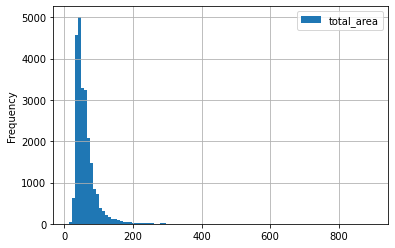

In [31]:
data.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True)

<AxesSubplot:ylabel='Frequency'>

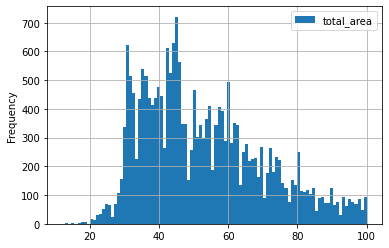

In [32]:
data.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, range=(12,100)) #возьмем срез данных от минимального до 100 м2

Минимальная общая площадь квартир в объявлениях 12 м2, максимальная 900 м2. Распределение данных нормальное, есть выбросы, но они не значительно влияют на данные. В среднем больше всего представлено квартир площадью около 45 м2.

***2. Жилая площадь***

In [33]:
data['living_area'].describe()

count    21796.000000
mean        34.457878
std         22.030420
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

<AxesSubplot:ylabel='Frequency'>

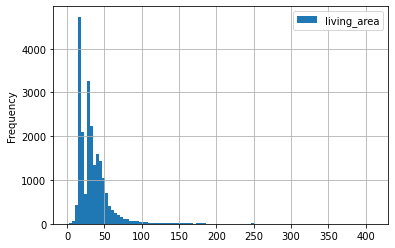

In [34]:
data.plot(y = 'living_area', kind = 'hist', bins = 100, grid=True)

<AxesSubplot:ylabel='Frequency'>

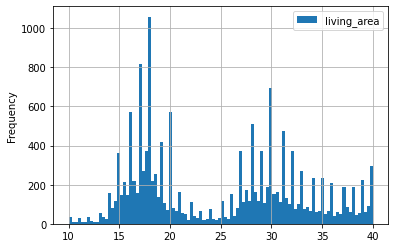

In [35]:
data.plot(y = 'living_area', kind = 'hist', bins = 100, grid=True, range=(10, 40))

Минимальная общая площадь квартир в объявлениях 2 м2, максимальная 409 м2. Гистограмма имеет 2 пика. Больше всего продают квартиры с жилой площадью около 18 м2 и 30 м2. Между двумя пиками есть спад предложений. 

***3. Площадь кухни***

In [36]:
data['kitchen_area'].describe()

count    21421.000000
mean        10.569754
std          5.905448
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

<AxesSubplot:ylabel='Frequency'>

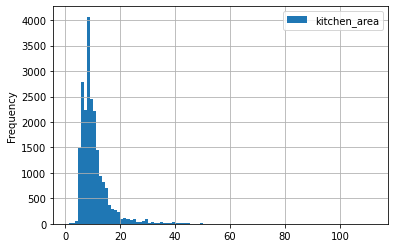

In [37]:
data.plot(y = 'kitchen_area', kind = 'hist', bins = 100, grid=True)

<AxesSubplot:ylabel='Frequency'>

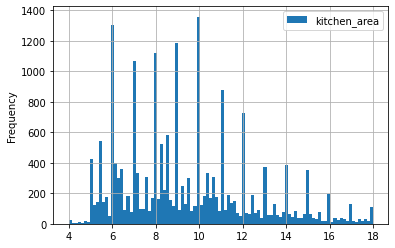

In [38]:
data.plot(y = 'kitchen_area', kind = 'hist', bins = 100, grid=True, range=(4, 18))

Минимальная общая площадь квартир в объявлениях 1.3 м2, максимальная 112 м2. Распределение данных не является нормальным и имеет несколько пиков. При этом пики приходятся на целые числа - 6, 8, 10 и так далее.

***4. Цена объекта***

In [39]:
data['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

<AxesSubplot:ylabel='Frequency'>

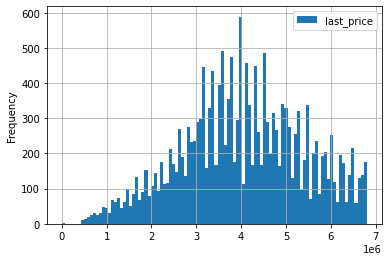

In [40]:
data.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, range=(1.219000e+04, 6.800000e+06))

<AxesSubplot:ylabel='Frequency'>

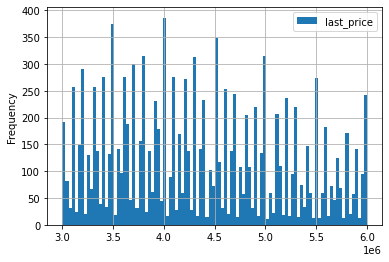

In [41]:
data.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, range=(3000000, 6000000))

В объявлениях представлены квартиры стоимостью от 12190 рублей до 763 млн. рублей. Наиболее часто цена объекта составляет 3,5 - 4 миллниона.

***5. Количество комнат***

In [42]:
data['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

<AxesSubplot:ylabel='Frequency'>

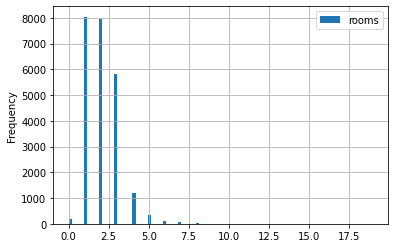

In [43]:
data.plot(y = 'rooms', kind = 'hist', bins = 100, grid=True)

<AxesSubplot:ylabel='Frequency'>

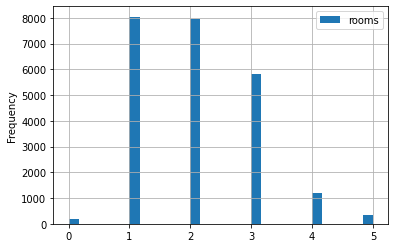

In [44]:
data.plot(y = 'rooms', kind = 'hist', bins = 30, grid=True, range=(0, 5))

В объявлениях представлено больше всего однокомнатных квартир. При этом с увеличением числа комнат в квартире количество объявлений снижается.

***6. Высота потолков***

In [45]:
data['ceiling_height'].describe()

count    23699.000000
mean         2.707540
std          0.990151
min          1.000000
25%          2.600000
50%          2.600000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

<AxesSubplot:ylabel='Frequency'>

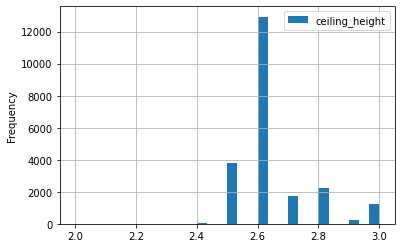

In [46]:
data.plot(y = 'ceiling_height', kind = 'hist', bins = 30, grid=True, range=(2, 3))

Минимальная высота потолков в объявлениях 1 метр, максимальная 100 метров. Очевидно, что в данных есть ошибка. Проверим, сколько есть квартир с высотой больше 10 метров и заменим их на корректные значения (25 метров нужно заменить на 2.5 метра и т.д.)

In [47]:
data.query('ceiling_height >10')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_meter,weekday,month,year,floor_category,kilometer_centers_nearest
355,17,3600000,55.2,2018-07-12,2,25.0,5,32.0,2,False,...,NaN,NaN,NaN,259.0,65217.39,3,7,2018,other,NaN
3148,14,2900000,75.0,2018-11-12,3,32.0,3,53.0,2,False,...,NaN,NaN,NaN,NaN,38666.67,0,11,2018,other,NaN
4643,0,4300000,45.0,2018-02-01,2,25.0,9,30.0,2,False,...,658.0,1.0,331.0,181.0,95555.56,3,2,2018,other,13.26
4876,7,3000000,25.0,2017-09-27,0,27.0,25,17.0,17,False,...,NaN,NaN,NaN,28.0,120000.00,2,9,2017,other,NaN
5076,0,3850000,30.5,2018-10-03,1,24.0,5,19.5,1,True,...,397.0,1.0,578.0,7.0,126229.51,2,10,2018,first,8.39
5246,0,2500000,54.0,2017-10-13,2,27.0,5,30.0,3,False,...,NaN,NaN,NaN,540.0,46296.30,4,10,2017,other,NaN
5669,4,4400000,50.0,2017-08-08,2,26.0,9,21.3,3,False,...,305.0,0.0,NaN,267.0,88000.00,1,8,2017,other,10.91
5807,17,8150000,80.0,2019-01-09,2,27.0,36,41.0,13,False,...,NaN,3.0,80.0,38.0,101875.00,2,1,2019,other,20.44
6246,6,3300000,44.4,2019-03-25,2,25.0,5,31.3,5,False,...,417.0,2.0,73.0,NaN,74324.32,0,3,2019,last,50.65
9379,5,3950000,42.0,2017-03-26,3,25.0,5,30.0,2,False,...,NaN,0.0,NaN,NaN,94047.62,6,3,2017,other,13.58


In [31]:
data.loc[data['ceiling_height'] >= 10, 'ceiling_height'] = data['ceiling_height']/10
data['ceiling_height'].describe()

count    23565.000000
mean         2.681135
std          0.243720
min          1.000000
25%          2.600000
50%          2.600000
75%          2.700000
max         10.000000
Name: ceiling_height, dtype: float64

Мы избавились от некорректных значений. В среднем высота потолков в объявлениях составляет около 2.6 метров.

***7. Тип этажа квартиры («первый», «последний», «другой»)***

<AxesSubplot:ylabel='last_price'>

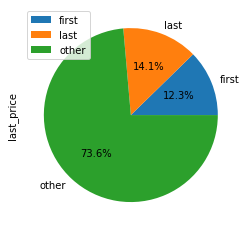

In [49]:
(data
    .pivot_table(index='floor_category', values='last_price', aggfunc='count')
    .plot(y='last_price', kind='pie', autopct='%1.1f%%') #построим круговую диаграмму по количеству объявлений разных типов этажа квартиры
)

Мы видим, что четверть объявлений состоит из квартир с первым или последним этажом. Это означает, что количество предложений о продаже таких квартир довольно высокое.

***8. Общее количество этажей в доме***

In [50]:
data['floors_total'].describe()

count    23699.000000
mean        10.681759
std          6.599383
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

<AxesSubplot:ylabel='Frequency'>

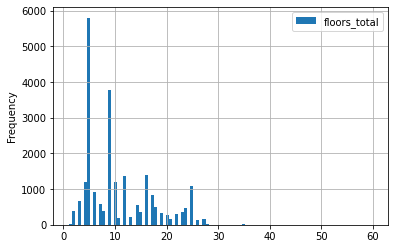

In [51]:
data.plot(y = 'floors_total', kind = 'hist', bins = 100, grid=True)

<AxesSubplot:ylabel='Frequency'>

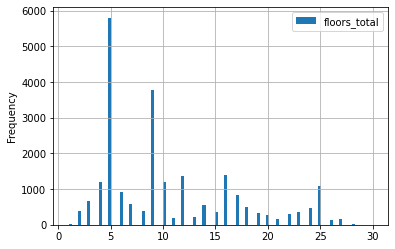

In [52]:
data.plot(y = 'floors_total', kind = 'hist', bins = 100, grid=True, range=(1, 30))

Минимум этажей в доме - 1, максимум - 60 этажей. Больше всего предложений о продаже квартир в пятиэтажных и девятиэтажных домах.

***9. Расстояние до центра города в метрах***

In [53]:
data['city_centers_nearest'].describe()

count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

<AxesSubplot:ylabel='Frequency'>

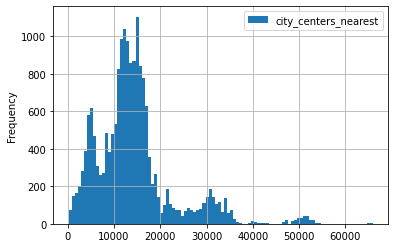

In [54]:
data.plot(y = 'city_centers_nearest', kind = 'hist', bins = 100, grid=True)

<AxesSubplot:ylabel='Frequency'>

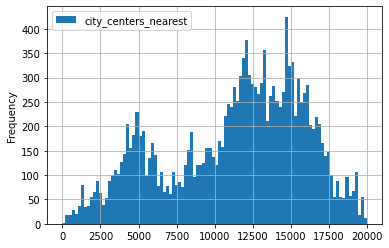

In [55]:
data.plot(y = 'city_centers_nearest', kind = 'hist', bins = 100, grid=True, range=(0, 20000))

Минимальное расстояние до центра города - 181 метр, максимальное - 65968 метров. Самый распространенный вариант - объявления, где расстояние до центра около 15000 метров

***10. Расстояние до ближайшего парка***

In [56]:
data['parks_nearest'].describe()

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

<AxesSubplot:ylabel='Frequency'>

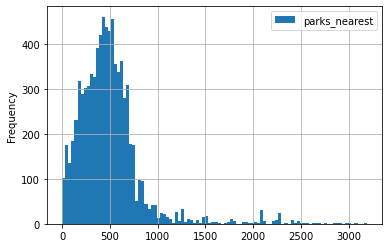

In [57]:
data.plot(y = 'parks_nearest', kind = 'hist', bins = 100, grid=True)

<AxesSubplot:ylabel='Frequency'>

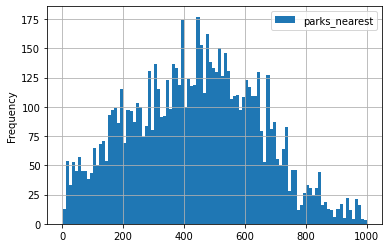

In [58]:
data.plot(y = 'parks_nearest', kind = 'hist', bins = 100, grid=True, range=(1, 1000))

Минимальное расстояние до ближайшего парка - 1 метр, максимальное - 3190 метров. Чаще всего встречаются объявления, где расстояние около 400 - 600 метров. Можно сделать вывод, что количество объявлений не значительно зависит от расстояния до парка. 

<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Замечательно проанализировала параметры, информативные гистограммы вывела, все описала и отметила верно.

***4.2. Изучение скорости продажи квартир***

In [59]:
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [60]:
data['days_exposition'].median()

95.0

Среднее время продажи около полугода - 180 дней. При этом медианное значение составляет 95 дней, что более точно определяет среднее время продажи.

<AxesSubplot:ylabel='Frequency'>

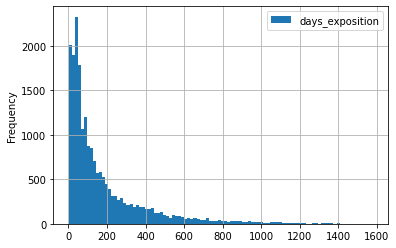

In [61]:
data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid=True)

<AxesSubplot:>

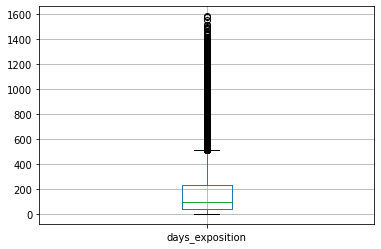

In [62]:
data.boxplot(column='days_exposition')

На графике видно распределение Пуассона. При этом хорошо заметны выбросы. Возьмем срез до 500 дней, чтоб их убрать.

<AxesSubplot:ylabel='Frequency'>

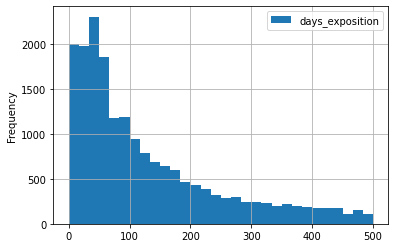

In [63]:
data.plot(y = 'days_exposition', kind = 'hist', bins = 30, grid=True, range=(0, 500))

<AxesSubplot:ylabel='Frequency'>

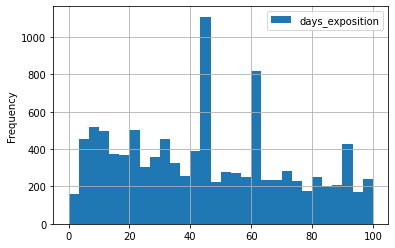

In [64]:
data.plot(y = 'days_exposition', kind = 'hist', bins = 30, grid=True, range=(0, 100))

Хорошо прослеживаются 2 пика, посмотрим еще более детально.

<AxesSubplot:ylabel='Frequency'>

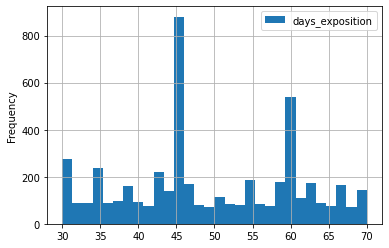

In [65]:
data.plot(y = 'days_exposition', kind = 'hist', bins = 30, grid=True, range=(30, 70))

In [66]:
data['days_exposition'].value_counts().head(10) #взглянем также на значения

45.0    880
60.0    538
7.0     234
30.0    208
90.0    204
4.0     176
3.0     158
5.0     152
14.0    148
9.0     143
Name: days_exposition, dtype: int64

Построив графики, мы увидели выделяющиеся значения на 45, 60 днях. В эти дни чаще всего снимают объявления с продажи. Возможно это касается правил размещения объявления в севисе. 

В среднем квартиры продают за 3 месяца. Скорость продажи можно определить по квартилям. 

Быстрая продажа - за 45 дней, долгая продажа - от 232 дней.

<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Именно так, все верно!

***4.3 Определение факторов, которые больше всего влияют на общую (полную) стоимость объекта***

Изучим, зависит ли цена от:

- общей площади
- жилой площади
- площади кухни
- количества комнат
- этажа, на котором расположена квартира (первый, последний, другой)
- даты размещения (день недели, месяц, год)

In [67]:
data.corr()['last_price'].sort_values(ascending=False) #посмотрим сразу на корреляцию

last_price                   1.000000
price_one_meter              0.736496
total_area                   0.653675
living_area                  0.566489
kitchen_area                 0.519872
rooms                        0.363343
ceiling_height               0.269880
ponds_around3000             0.159996
parks_around3000             0.151058
total_images                 0.104473
days_exposition              0.081146
is_apartment                 0.026958
floor                        0.026576
balcony                      0.008559
month                        0.002779
weekday                      0.001550
floors_total                -0.006983
open_plan                   -0.008802
parks_nearest               -0.016414
studio                      -0.025362
airports_nearest            -0.026239
year                        -0.043089
ponds_nearest               -0.084809
city_centers_nearest        -0.206747
kilometer_centers_nearest   -0.206747
Name: last_price, dtype: float64

***Общая площадь***

Корреляция Пирсона показывает, что есть связь между общей площадью и стоимостью квартиры (корреляция 0.6). С ростом общей площади объекта наблюдается рост цены, от 100 м2 зависимость становится менее ярко-выраженной.

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

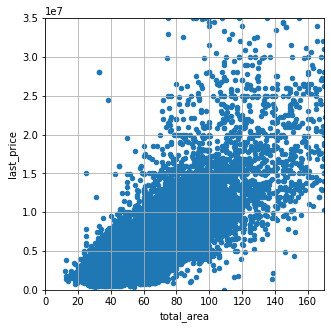

In [32]:
(data
    .plot(y = 'last_price', x='total_area', kind = 'scatter', grid=True, style='o', figsize=(5, 5), xlim=(0, 170), ylim=(0, 35000000))
)

***Жилая площадь***

Корреляция между ценой и жилой площадью является не сильной (0,56). С увеличением жилой площади увеличивается и стоимость объекта. Однако связь не настолько сильная, как в случае с зависимостью цены от общей площади.

<AxesSubplot:xlabel='living_area', ylabel='last_price'>

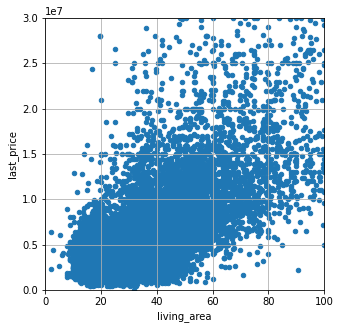

In [35]:
(data
    .plot(y = 'last_price', x='living_area', kind = 'scatter', grid=True, style='o', figsize=(5, 5), xlim=(0, 100), ylim=(0, 30000000))
)

***Площадь кухни***

Корреляция между площадью кухни и ценой квартиры составила 0.52. С увеличением площади кухни увеличивается и стоимость квартиры. Связь также является не сильной.          

<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

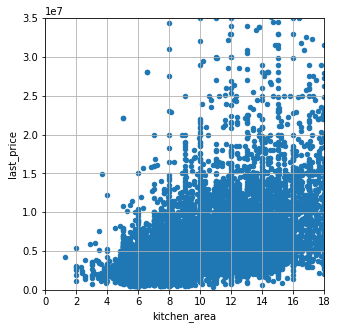

In [38]:
(data
    .plot(y = 'last_price', x='kitchen_area', kind = 'scatter', grid=True, style='o', figsize=(5, 5), xlim=(0, 18), ylim=(0, 35000000))
)

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера V1<a class="tocSkip"></h2>


<b>На доработку🤔:</b>
Для площадей не нужно рассчитывать сводные таблицы перед построением диаграмм рассеяния. Зависимость между количественными величинами лучше в исходном виде изображать, так как сводная таблица усредняет значения и можно не увидеть полноценного распределения, возможно есть особенности в распределении.

<div class="alert alert-success">
<h2> Комментарий ревьюера V2<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Графики скорректировала верно.

***Количество комнат***

<AxesSubplot:xlabel='rooms'>

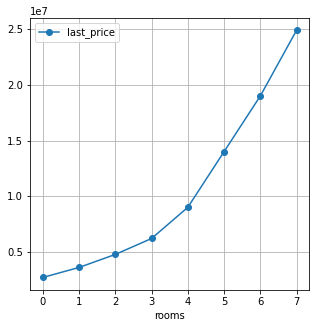

In [71]:
(data
    .pivot_table(index='rooms', values='last_price', aggfunc='median')
    .sort_values(by='last_price', ascending=False)
    .query('rooms <= 7')
    .plot(y='last_price', grid=True, style='o-', figsize=(5, 5))
)

Корреляция между ценой и количеством комнат в квартире довольно слабая 0.36. На графике можно заметить, что с увеличением комнат увеличивается цена квартиры

***Этаж***

<AxesSubplot:xlabel='floor_category'>

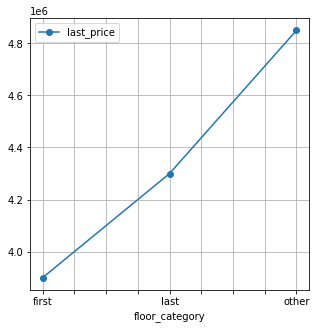

In [72]:
(data
    .pivot_table(index='floor_category', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(5, 5))
)

Стоимость квартир на первом или последнем этаже гораздо ниже, чем у квартир с не последним/первым этажом. Самая низкая стоимость у квартир на первом этаже. Причины довольно понятны :)

***Дата размещения (день недели, месяц, год)***

*День недели*

<AxesSubplot:xlabel='weekday'>

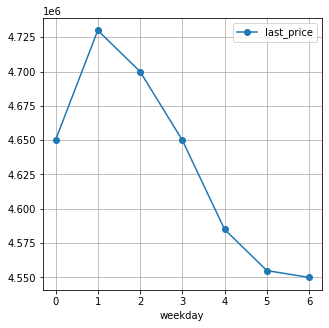

In [73]:
(data
    .pivot_table(index='weekday', values='last_price', aggfunc='median')
    .plot(y='last_price', grid=True, style='o-', figsize=(5, 5))
)

Исходя из графика мы видим, что объявления, размещенные в выходные имеют меньшую стоимость, чем объявления, размещенные в будние. Пик стоимости приходится на вторник. 

*Месяц*

<AxesSubplot:xlabel='month'>

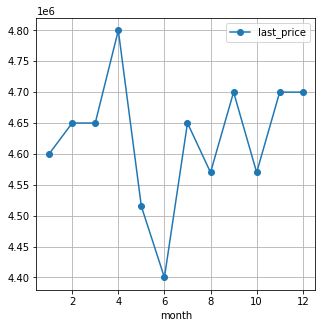

In [74]:
(data
    .pivot_table(index='month', values='last_price', aggfunc='median')
    .plot(y='last_price', grid=True, style='o-', figsize=(5, 5))
)

Пик стоимости приходится на апрель. А самая низкая цена в июне. Скорее всего связано с отпусками :) 

*Год*

<AxesSubplot:xlabel='year'>

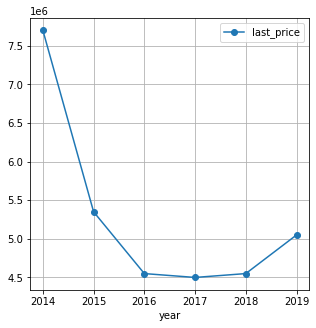

In [75]:
(data
    .pivot_table(index='year', values='last_price', aggfunc='median')
    .plot(y='last_price', grid=True, style='o-', figsize=(5, 5))
)

C 2014 года цена квартир начала падать, с 2017 вновь расти.

Таким образом, на стоимость квартиры больше всего влияют общая площадь, жилая площадь, площадь кухни, в меньшей степени количество комнат. С увеличением площади помещений и количества комнат, увеличивается и стоимость квартиры. 
Наиболее низкая стоимость у квартир, расположенных на первом/последнем этаже. Также наиболее низкая стоимость встречается у квартир, размещенных в июне или в выходные дни. Самая высокая в апреле и в будние дни (вторник - пик). Квартиры после 2014 года начали дешеветь, а с 2017 вновь начали расти по стоимости. 

<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> По выводам все абсолютно верно, видно, что цена больше всего зависит от площадей, количества комнат, тип этажа также влияет на стоимость.

***4.4 Изучение средней цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений*** 

In [76]:
data['locality_name'].value_counts(ascending=False).head(10) #выявим 10 населенных пунктов с большим числом объявлений

санкт-петербург    15721
 мурино              556
 шушары              440
всеволожск           398
пушкин               369
колпино              338
 парголово           327
гатчина              307
 кудрово             299
выборг               237
Name: locality_name, dtype: int64

In [77]:
city = data['locality_name'].value_counts(ascending=False).head(10) #закинем их в отдельную переменную

(data
    .query('locality_name in @city.index')
    .pivot_table(index='locality_name', values='price_one_meter', aggfunc='median') #создадим сводную таблицу
    .sort_values(by='price_one_meter', ascending=False)
)

,price_one_meter
locality_name,
санкт-петербург,104761.900
пушкин,100000.000
кудрово,91860.470
парголово,91642.860
мурино,85890.220
шушары,76876.175
колпино,74723.745
гатчина,67796.610
всеволожск,65789.470


Самая высокая средняя стоимость квадратного метра в Санкт-Петербурге, что ожидаемо. На втором месте Пушкин. Наименьшая стоимость квадратного метра в Выборге. 

<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Да, все верно.

***4.5 Удаленность от центра***

Выделим квартиры в Санкт-Петербурге и вычислим их среднюю стоимость на разном удалении от центра.

In [78]:
data.query('locality_name == "санкт-петербург"')['kilometer_centers_nearest'].describe()

count    15660.000000
mean        11.601250
std          4.842022
min          0.180000
25%          8.327500
50%         12.240000
75%         14.940000
max         29.490000
Name: kilometer_centers_nearest, dtype: float64

<AxesSubplot:xlabel='kilometer_centers_nearest'>

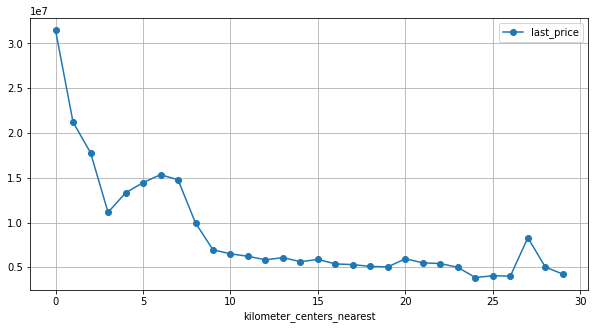

In [85]:
data['kilometer_centers_nearest'] = data['kilometer_centers_nearest'].round(0)

(data
    .query('locality_name == "санкт-петербург"')
    .pivot_table(index='kilometer_centers_nearest', values='last_price')
    .plot(grid=True, style='o-', figsize=(10, 5))
)

In [40]:
(data
    .query('locality_name == "санкт-петербург"')
    .pivot_table(index='kilometer_centers_nearest', values='last_price')
    .round(0)
    .sort_values(by='last_price', ascending=False)
)

,last_price
kilometer_centers_nearest,
0.0,31449116.0
1.0,21206721.0
2.0,17788320.0
6.0,15338418.0
7.0,14775153.0
5.0,14455996.0
4.0,13304280.0
3.0,11137395.0
8.0,9949111.0


Самые дорогие квартиры расположены в центре города на расстоянии от 0 до 2 км, стоимость квартир в этих районах в пределах     17-30 млн. рублей. Начиная с расстояния от 7 и более километров от центра города, стоимость квартир резко уменьшается, цены ниже 14 млн. И начиная с расстояния 10 км, удаленность от центра не влияет значительно на стоимость жилья, ценовой диапазон составляет до 10 млн, с небольшим пиком на расстоянии около 27 км от центра.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера V1<a class="tocSkip"></h2>


<b>На доработку🤔:</b>
Зачем ты на графике ограничила данные 15 км? А что происходит после 7 км? Какая общая тенденция прослеживается, разве цена от расстояния не зависит?

<div class="alert alert-warning">
<h2> Комментарий ревьюера V2<a class="tocSkip"> </h2>

<b>Некоторые замечания и рекомендации💡:</b> Можно увидеть общую тенденцию снижения цены при удалении от центра. После 10 км также есть зависимость, цены постепенно снижается, это видно на графике.

# Общий вывод

Мы провели исследование при помощи данных сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. 

**Целью исследования было определение рыночной стоимости объектов недвижимости. Для этого мы провели анализ и установили параметры, которые влияют на цену объекта.**

*Этапы исследования и выводы:*

**1. Изучили общую информацию о данных.**

Наш датасет состоял из 23699 записей. Было обнаружено большое количество пропущенных значений в столбцах, некорректный тип данных, аномальные значения.
    
**2. Выполнили предобработку данных**

    - заполнили явные пропуски
    - округлили значения
    - изменили тип данных на подходящий
    - указали возможные причины пропусков
    
    
**3. Добавили новые столбцы в таблицу для дальнейшего анализа:**

    - price_one_meter – цена за 1 м2
    - weekday – день недели публикации объявления
    - month – месяц публикации объявления
    - year – год публикации объявления
    - floor_category – тип этажа квартиры (первый, последний, другой)
    - kilometer_centers_nearest – расстояние до центра города в км


**4. Провели исследовательский анализ данных**

**4.1 Изучили параметры объектов и построили гистограммы для:**
    
    - общей площади. В среднем общая площадь 45 м2
    - жилой площади. В среднем жилая площадь 18 и 30 м2
    - площади кухни. В среднем около 10 м2
    - цены объекта. Чаще всего это 3,5 – 4 миллиона
    - количества комнат. Больше всего однокомнатных квартир. Чем больше комнат в квартире, тем меньше объявлений
    - высоты потолков. Средняя высота 2.6 метра
    - типа этажа квартиры. Четверть объявлений с 1 или последним этажом
    - общего количества этажей в доме. Чаще дома с 5 и 9 этажами
    - расстояния до центра города и парка. Чаще всего расстояние до центра около 15000 метров. А до парка 400-600 метров.

**4.2 Изучили скорость продажи квартир**

В среднем квартиры продаются за 3 месяца. Быстрой продажей можно считать продажу за 45 дней, а долгой за 232 дня и более.

**4.3 Определили факторы, которые влияют на стоимость объекта.**

Мы проанализировали множество факторов, которые могут влиять на стоимость жилья. Нам удалось установить, что стоимость квартиры больше всего зависит от общей площади, жилой площади, площади кухни и количества комнат. С увеличением площади помещений и количества комнат увеличивается и стоимость квартиры. Также на стоимость объекта недвижимости влияет тип этажа квартиры. Наиболее низкая стоимость у квартир, расположенных на первом или последнем этаже, в отличие от квартир на других этажах. Также наиболее низкая стоимость встречается у квартир, размещенных в июне или в выходные дни. Самая высокая стоимость же в апреле и в будние дни, особенно во вторник. Также можно увидеть, что квартиры после 2014 года начали падать в стоимости, однако с 2017 вновь начали расти.

**4.4 Изучили среднюю цену квадратного метра в 10 населенных пунктах**

Мы посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений, также построили сводную таблицу с количеством объявлений и средней ценой квадратного метра для этих населенных пунктов. Выделили населённые пункты с самой высокой и низкой стоимостью квадратного метра: самая высокая средняя стоимость оказалась в самом Санкт-Петербурге. Наименьшая стоимость квадратного метра оказалась при этом в Выборге.

**4.5 Изучили влияние удаленности от центра да стоимость объектов**

Мы выделили квартиры в Санкт-Петербурге и вычислили их среднюю стоимость на разном удалении от центра. Самые дорогие квартиры расположены в центре города на расстоянии от 0 до 2 км, стоимость квартир в этих районах в пределах 17-30 млн. рублей. Начиная с расстояния от 7 и более километров от центра города, стоимость квартир резко уменьшается, цены ниже 14 млн. И начиная с расстояния 10 км, удаленность от центра не влияет значительно на стоимость жилья, ценовой диапазон составляет до 10 млн, с небольшим пиком на расстоянии около 27 км от центра.

<div class="alert alert-warning">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Некоторые замечания и рекомендации💡:</b> В итоговом выводе нужно достаточно подробно написать основные пункты выявленных зависимостей. Стоит доработать вывод с учетом моих комментариев по ходу работы. В итоговом выводе также старайся оставлять рекомендации для последующих шагов. Например рекомендации, что можно обработать и проанализировать другие признаки, на что твоим коллегам стоить обратить внимание.

<div class="alert alert-success">
<h2> Комментарий ревьюера V2<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Отличный вывод, все четко, понятно и структурировано. Вывод в полной мере отражает существующие зависимости, и по нему можно принимать дальнейшие решения.
</div>

***Приятно познакомиться! Спасибо большое за все комментарии :)***

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Файл с данными открыт.
- [x]  Файл с данными изучен: выведены первые строки, использован метод `info()`, построены гистограммы.
- [x]  Найдены пропущенные значения.
- [x]  Пропущенные значения заполнены там, где это возможно.
- [x]  Объяснено, какие пропущенные значения обнаружены.
- [x]  В каждом столбце установлен корректный тип данных.
- [x]  Объяснено, в каких столбцах изменён тип данных и почему.
- [x]  Устранены неявные дубликаты в названиях населённых пунктов.
- [x]  Обработаны редкие и выбивающиеся значения (аномалии).
- [x]  В таблицу добавлены новые параметры:
       – цена одного квадратного метра;
       – день публикации объявления (0 - понедельник, 1 - вторник и т. д.);
       – месяц публикации объявления;
       – год публикации объявления;
       – тип этажа квартиры (значения — «первый», «последний», «другой»);
       – расстояние до центра города в километрах.
- [x]  Изучены и описаны параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего парка.
- [x]  Выполнено задание «Изучите, как быстро продавались квартиры (столбец `days_exposition`)»:
    - построена гистограмма;
    - рассчитаны среднее и медиана;
    - описано, сколько обычно занимает продажа и указано, какие продажи можно считать быстрыми, а какие — необычно долгими.
- [x]  Выполнено задание «Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта». Построены графики, которые показывают зависимость цены от параметров:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - количество комнат;
        - тип этажа, на котором расположена квартира (первый, последний, другой);
        - дата размещения (день недели, месяц, год).
- [x]  Выполнено задание «Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений»:
    - выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра.
- [x]  Выполнено задание «Выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите их среднюю стоимость на разном удалении от центра»:
    -  учтён каждый километр расстояния, известны средние цены квартир в одном километре от центра, в двух и так далее;
    -  описано, как стоимость объекта зависит от расстояния до центра города;
    -  построен график изменения средней цены для каждого километра от центра Петербурга.
- [x]  На каждом этапе сделаны промежуточные выводы.
- [x]  В конце проекта сделан общий вывод.

<div style="border:solid Chocolate 2px; padding: 40px">

**Общий вывод по проекту**

Спасибо за твой проект! Я уверен, что ты приложила все усилия, чтобы сделать этот проект. Это видно по твоей работе, а сформулированные выводы отражают, насколько успешно ты осваиваешь материал.

**Отмечу отдельные положительные моменты проекта🙂**:

* Ты полностью следовала всем этапам выполнения задания и справилась почти со всем. Хорошая работа!
* Отдельно выделю некоторые выводы, которые ты смогла сформулировать абсолютно точно!
* У тебя опрятный и читаемый код. Возможно это звучит банально, однако при работе с чужим кодом это крайне важно)


**На что стоит обратить внимание🤓**:

* Важно доработать итоговый вывод.
* Нужно корректно обработать все признаки.
* Еще раз посмотри на зависимость цены от расстояния до центра.
* Остальные рекомендации ты найдешь в моих комментариях!


**Желаю удачи и жду твой проект на повторное ревью!**😉

<div style="border:solid Chocolate 2px; padding: 40px">

Ты отлично справилась с данной работой! Видно, как ты успешно осваиваешь материал, применяешь полученные знания на практике. Мне было очень приятно проверять твою работу, надеюсь, мои комментарии и советы были для тебя полезными.

**Желаю удачи в последующем обучении и исследованиях!**😉